In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import statsmodels.api as sm
df=pd.read_csv("Charging_events_data - charging_events_meter_reading.csv")

In [6]:
df.head()
df.dtypes

Start Time             object
Meter Start (Wh)        int64
Meter End(Wh)         float64
Meter Total(Wh)       float64
Total Duration (s)      int64
Charger_name           object
dtype: object

In [10]:
#New column Meter total in KWH
df['Meter Total(KWH)']=df["Meter Total(Wh)"]*0.001
#Removing unnamed charger_id
df['Charger_name'] = df['Charger_name'].replace('NA', pd.NA)
df = df.dropna(subset=['Charger_name'])
#New column with duration in hours
df['Total_duration(hrs)']=df["Total Duration (s)"]/3600
#Converting start time to datetime format
df['Start Time'] = pd.to_datetime(df['Start Time'])
#converting the charger_name to string/objecttype
df['Charger_name']= df['Charger_name'].astype(str)
#New column end time based on duration of charging
df['End Time'] = df['Start Time'] + pd.to_timedelta(df['Total Duration (s)'], unit='s')
#Adding new column day of the week
df['Day of the Week'] = df['Start Time'].dt.day_name()
#Adding new column hour of the day
df['Hour of Day'] = df['Start Time'].dt.hour
#Adding new column charger name as only id
df['Charger_ID'] = df['Charger_name'].apply(lambda x: int(re.search(r'\d+', x).group(0)))
#dropping records having 0 duration and 0 meter readings and storing to new df
df2 = df[(df['Meter Total(Wh)'] != 0) & (df['Total Duration (s)'] != 0)].copy()
#Adding new column power rate KW
df2.loc[:, 'Power Rate (KW)'] = df2['Meter Total(KWH)'] / df2['Total_duration(hrs)']
#validation
df2.dtypes

Start Time             datetime64[ns]
Meter Start (Wh)                int64
Meter End(Wh)                 float64
Meter Total(Wh)               float64
Total Duration (s)              int64
Charger_name                   object
Meter Total(KWH)              float64
Total_duration(hrs)           float64
End Time               datetime64[ns]
Day of the Week                object
Hour of Day                     int64
Charger_ID                      int64
Power Rate (KW)               float64
dtype: object

In [68]:
df2[df2['Charger_ID']==1].head(10)

,Start Time,Meter Start (Wh),Meter End(Wh),Meter Total(Wh),Total Duration (s),Charger_name,Meter Total(KWH),Total_duration(hrs),End Time,Day of the Week,Hour of Day,Charger_ID,Power Rate (KW)
271,2019-05-09 10:55:00,0,12695.83,12695.83,3587,charger_1,12.69583,0.996389,2019-05-09 11:54:47,Thursday,10,1,12.741842
272,2019-09-09 05:47:00,0,33101.51,33101.51,6906,charger_1,33.10151,1.918333,2019-09-09 07:42:06,Monday,5,1,17.255348
273,2019-11-09 14:05:00,0,13807.38,13807.38,3726,charger_1,13.80738,1.035000,2019-11-09 15:07:06,Saturday,14,1,13.340464
274,2019-12-09 11:05:00,0,35804.92,35804.92,7234,charger_1,35.80492,2.009444,2019-12-09 13:05:34,Monday,11,1,17.818318
275,2019-09-16 07:17:00,0,32996.70,32996.70,5240,charger_1,32.99670,1.455556,2019-09-16 08:44:20,Monday,7,1,22.669489
276,2019-09-16 09:33:00,0,17109.95,17109.95,4350,charger_1,17.10995,1.208333,2019-09-16 10:45:30,Monday,9,1,14.159959


In [84]:
df2.describe()

,Meter Start (Wh),Meter End(Wh),Meter Total(Wh),Total Duration (s),Meter Total(KWH),Total_duration(hrs),Hour of Day,Charger_ID,Power Rate (KW)
count,1.670000e+02,1.670000e+02,167.000000,1.670000e+02,167.000000,167.000000,167.000000,167.000000,167.000000
mean,3.216183e+05,3.312812e+05,9662.899281,1.199537e+05,9.662899,33.320484,10.622754,5.898204,2.577300
std,3.477542e+05,3.461375e+05,14569.940599,3.464249e+05,14.569941,96.229139,3.606582,4.050338,7.581268
min,0.000000e+00,5.659070e+03,9.770000,1.200000e+01,0.009770,0.003333,3.000000,1.000000,0.000022
25%,7.363000e+04,8.107181e+04,1205.520000,5.131500e+03,1.205520,1.425417,8.000000,3.000000,0.114345
50%,1.787700e+05,1.788596e+05,4698.860000,3.263200e+04,4.698860,9.064444,10.000000,4.000000,0.739817
75%,4.907780e+05,5.140272e+05,12356.640000,8.806850e+04,12.356640,24.463472,12.000000,8.000000,2.383610
max,1.193443e+06,1.197233e+06,126350.920000,3.020411e+06,126.350920,839.003056,22.000000,16.000000,88.494808


## Total KWH distribution

In [13]:
df2["Meter Total(KWH)"].describe()

count    167.000000
mean       9.662899
std       14.569941
min        0.009770
25%        1.205520
50%        4.698860
75%       12.356640
max      126.350920
Name: Meter Total(KWH), dtype: float64

<Axes: >

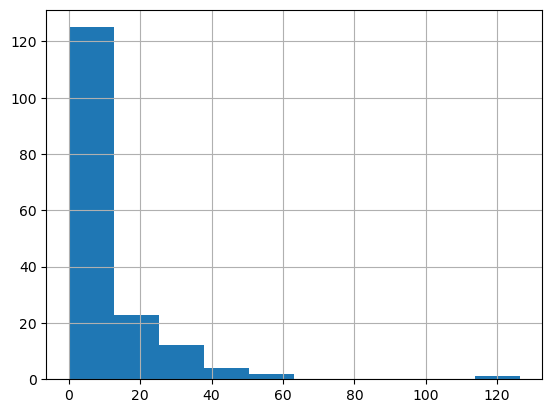

In [12]:
df2['Meter Total(KWH)'].hist()

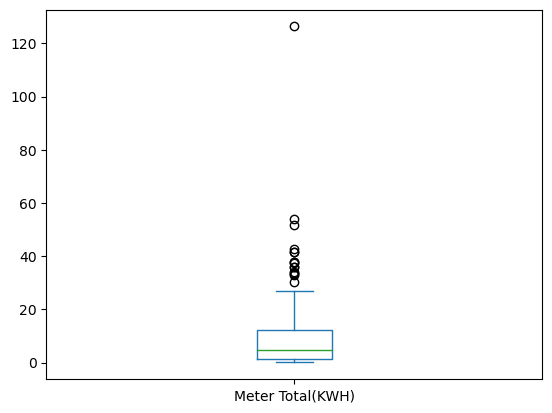

In [14]:
df2["Meter Total(KWH)"].plot(kind="box")
plt.show()

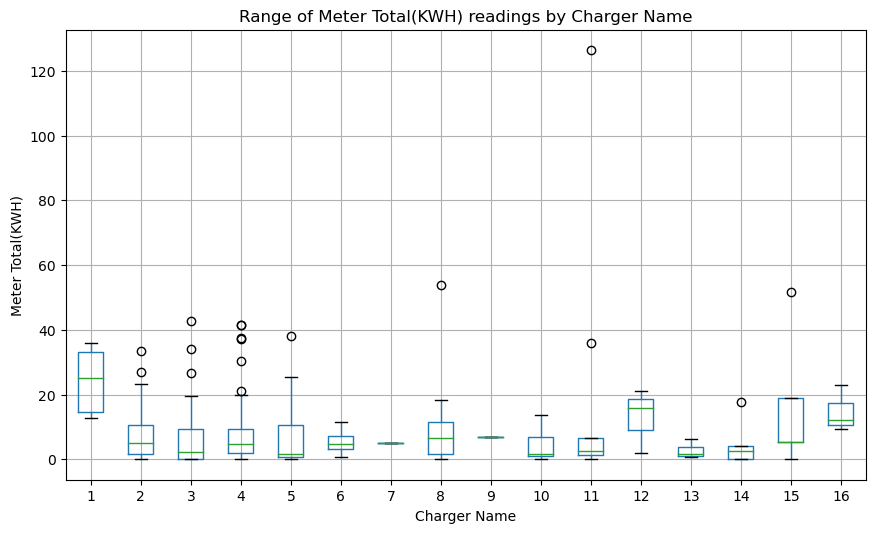

In [28]:
df2.boxplot(column="Meter Total(KWH)", by="Charger_ID", figsize=(10, 6))
plt.title("Range of Meter Total(KWH) readings by Charger Name")
plt.suptitle("")
plt.xlabel("Charger Name")
plt.ylabel("Meter Total(KWH)")
plt.show()

Text(0.5, 1.0, 'Distribution of duration of Charge session')

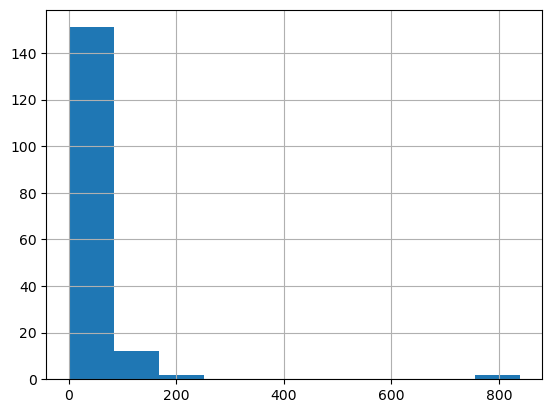

In [55]:
#df2["Total_duration(hrs)"].describe()
df2["Total_duration(hrs)"].hist()
ax.set_title( "Distribution of duration of Charge session" )

## Power rate distribution across chargers

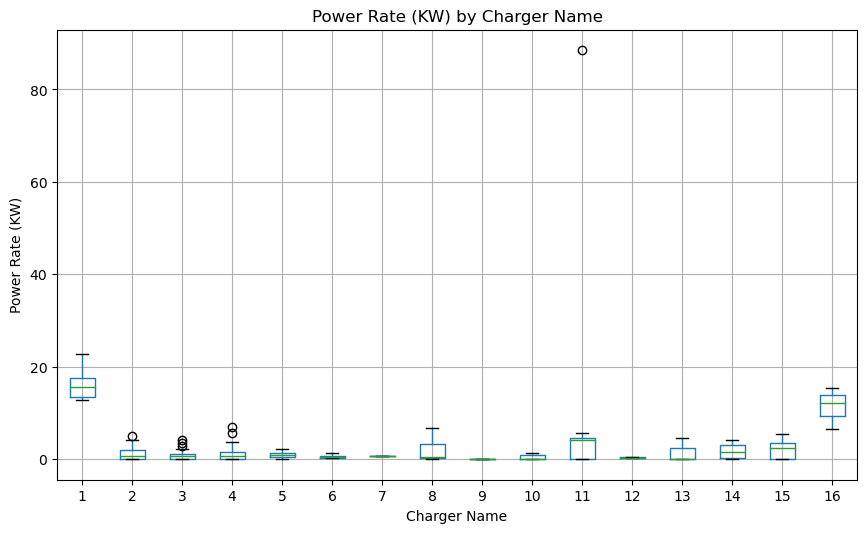

In [16]:
df2.boxplot(column="Power Rate (KW)", by="Charger_ID", figsize=(10, 6))
plt.title("Power Rate (KW)  by Charger Name")
plt.xlabel("Charger Name")
plt.suptitle("")
plt.ylabel("Power Rate (KW)")
#plt.xticks(rotation=90)
plt.show()

In [63]:
df2.describe()

,Meter Start (Wh),Meter End(Wh),Meter Total(Wh),Total Duration (s),Meter Total(KWH),Total_duration(hrs),Hour of Day,Charger_ID,Power Rate (KW)
count,1.670000e+02,1.670000e+02,167.000000,1.670000e+02,167.000000,167.000000,167.000000,167.000000,167.000000
mean,3.216183e+05,3.312812e+05,9662.899281,1.199537e+05,9.662899,33.320484,10.622754,5.898204,2.577300
std,3.477542e+05,3.461375e+05,14569.940599,3.464249e+05,14.569941,96.229139,3.606582,4.050338,7.581268
min,0.000000e+00,5.659070e+03,9.770000,1.200000e+01,0.009770,0.003333,3.000000,1.000000,0.000022
25%,7.363000e+04,8.107181e+04,1205.520000,5.131500e+03,1.205520,1.425417,8.000000,3.000000,0.114345
50%,1.787700e+05,1.788596e+05,4698.860000,3.263200e+04,4.698860,9.064444,10.000000,4.000000,0.739817
75%,4.907780e+05,5.140272e+05,12356.640000,8.806850e+04,12.356640,24.463472,12.000000,8.000000,2.383610
max,1.193443e+06,1.197233e+06,126350.920000,3.020411e+06,126.350920,839.003056,22.000000,16.000000,88.494808


In [64]:
print(df2['Meter Total(KWH)'].describe())
print(df2['Power Rate (KW)'].describe())
print(df2['Total_duration(hrs)'].describe())

#Meter Total(KWH)
#Power Rate (KW)
#Total_duration(hrs)

count    167.000000
mean       9.662899
std       14.569941
min        0.009770
25%        1.205520
50%        4.698860
75%       12.356640
max      126.350920
Name: Meter Total(KWH), dtype: float64
count    167.000000
mean       2.577300
std        7.581268
min        0.000022
25%        0.114345
50%        0.739817
75%        2.383610
max       88.494808
Name: Power Rate (KW), dtype: float64
count    167.000000
mean      33.320484
std       96.229139
min        0.003333
25%        1.425417
50%        9.064444
75%       24.463472
max      839.003056
Name: Total_duration(hrs), dtype: float64


## Total duration distribution

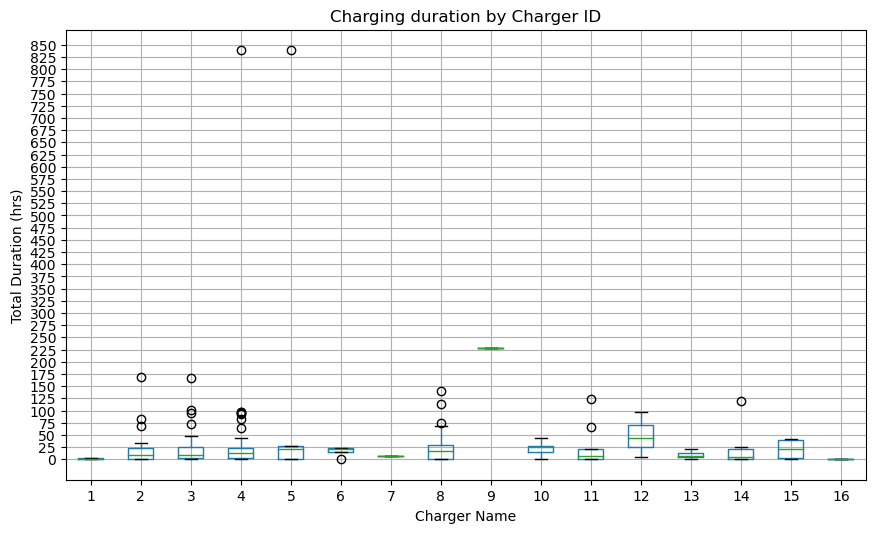

In [17]:
df2.boxplot(column="Total_duration(hrs)", by="Charger_ID", figsize=(10, 6))
plt.title("Charging duration by Charger ID")
plt.suptitle("")  
plt.xlabel("Charger Name")
plt.ylabel("Total Duration (hrs)")
plt.yticks(range(0, int(df2["Total_duration(hrs)"].max()) + 25, 25))
plt.show()
# plt.ylim(0, your_upper_limit)

## Line graph of KWH consumed

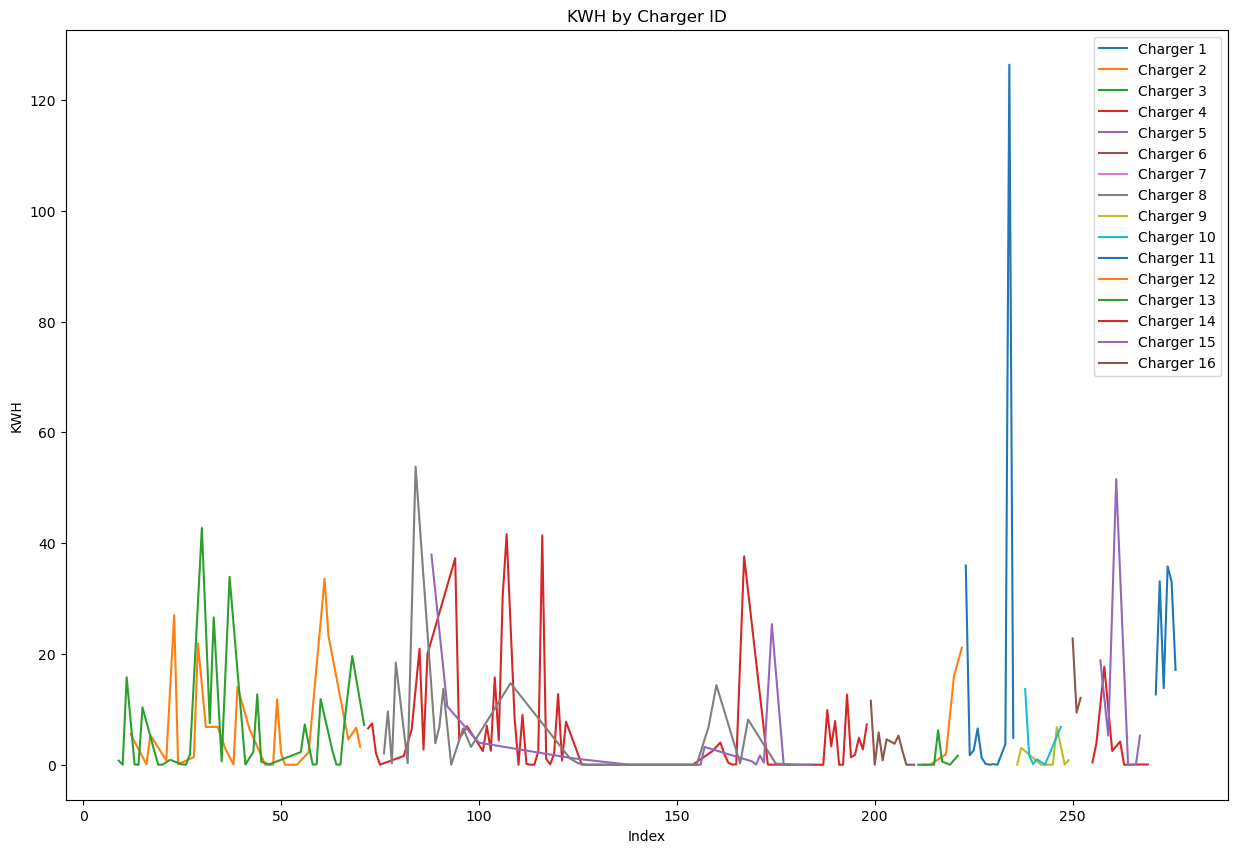

In [18]:
import matplotlib.pyplot as plt
groups = df.groupby('Charger_ID')
plt.figure(figsize=(15, 10))
for name, group in groups:
    plt.plot(group.index, group['Meter Total(KWH)'], label=f'Charger {name}')
plt.xlabel('Index')
plt.ylabel('KWH')
plt.title('KWH by Charger ID')
plt.legend()
plt.show()

## Box plot hour of day

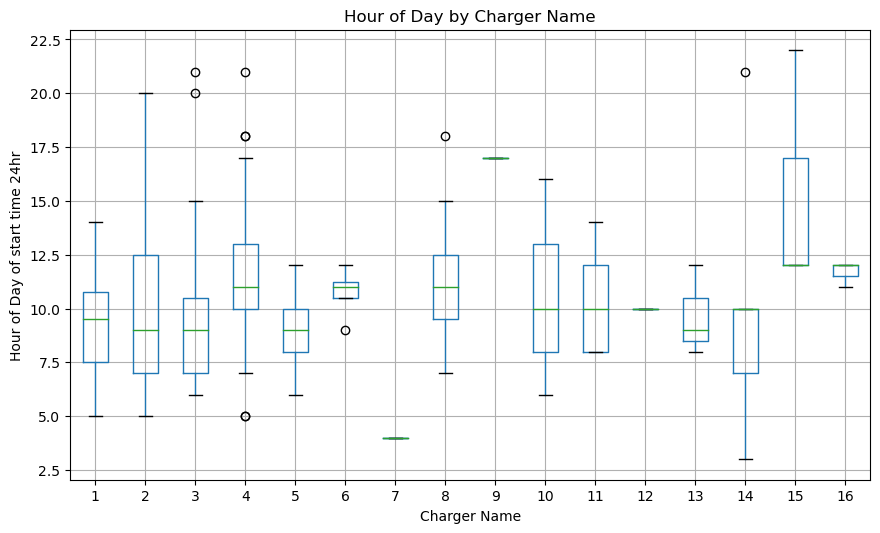

In [21]:
df2.boxplot(column="Hour of Day", by="Charger_ID", figsize=(10, 6))
plt.title("Hour of Day by Charger Name")
plt.xlabel("Charger Name")
plt.suptitle("")
plt.ylabel("Hour of Day of start time 24hr")
#plt.xticks(rotation=90)
plt.show()

<Axes: >

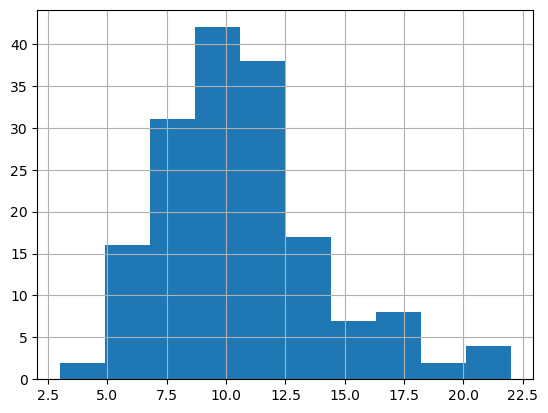

In [83]:
df2['Hour of Day'].hist()

## Box plot for Day of week

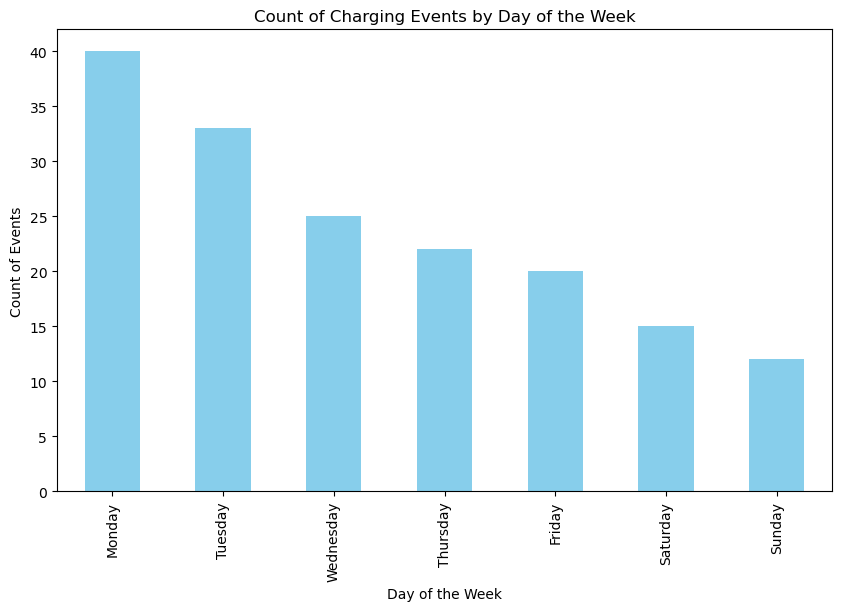

In [25]:
weekday_counts = df2['Day of the Week'].value_counts()
plt.figure(figsize=(10, 6))
weekday_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Charging Events by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('No of Charging events')
plt.show()

<Axes: >

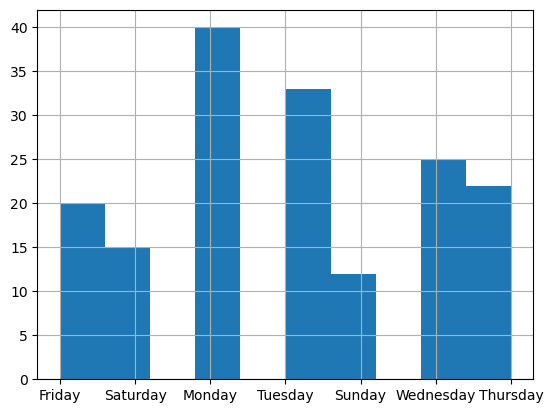

In [26]:
df2['Day of the Week'].hist()

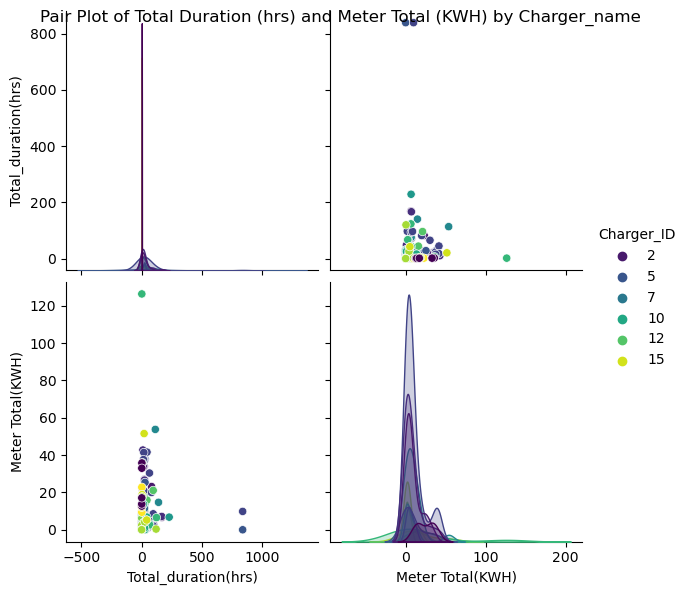

In [42]:
sns.pairplot(data=df2, vars=['Total_duration(hrs)', 'Meter Total(KWH)'], hue='Charger_ID', height=3,palette='viridis')

plt.suptitle('Pair Plot of Total Duration (hrs) and Meter Total (KWH) by Charger_name')

plt.show()

## Scatter plot total units vs total duration charger wise

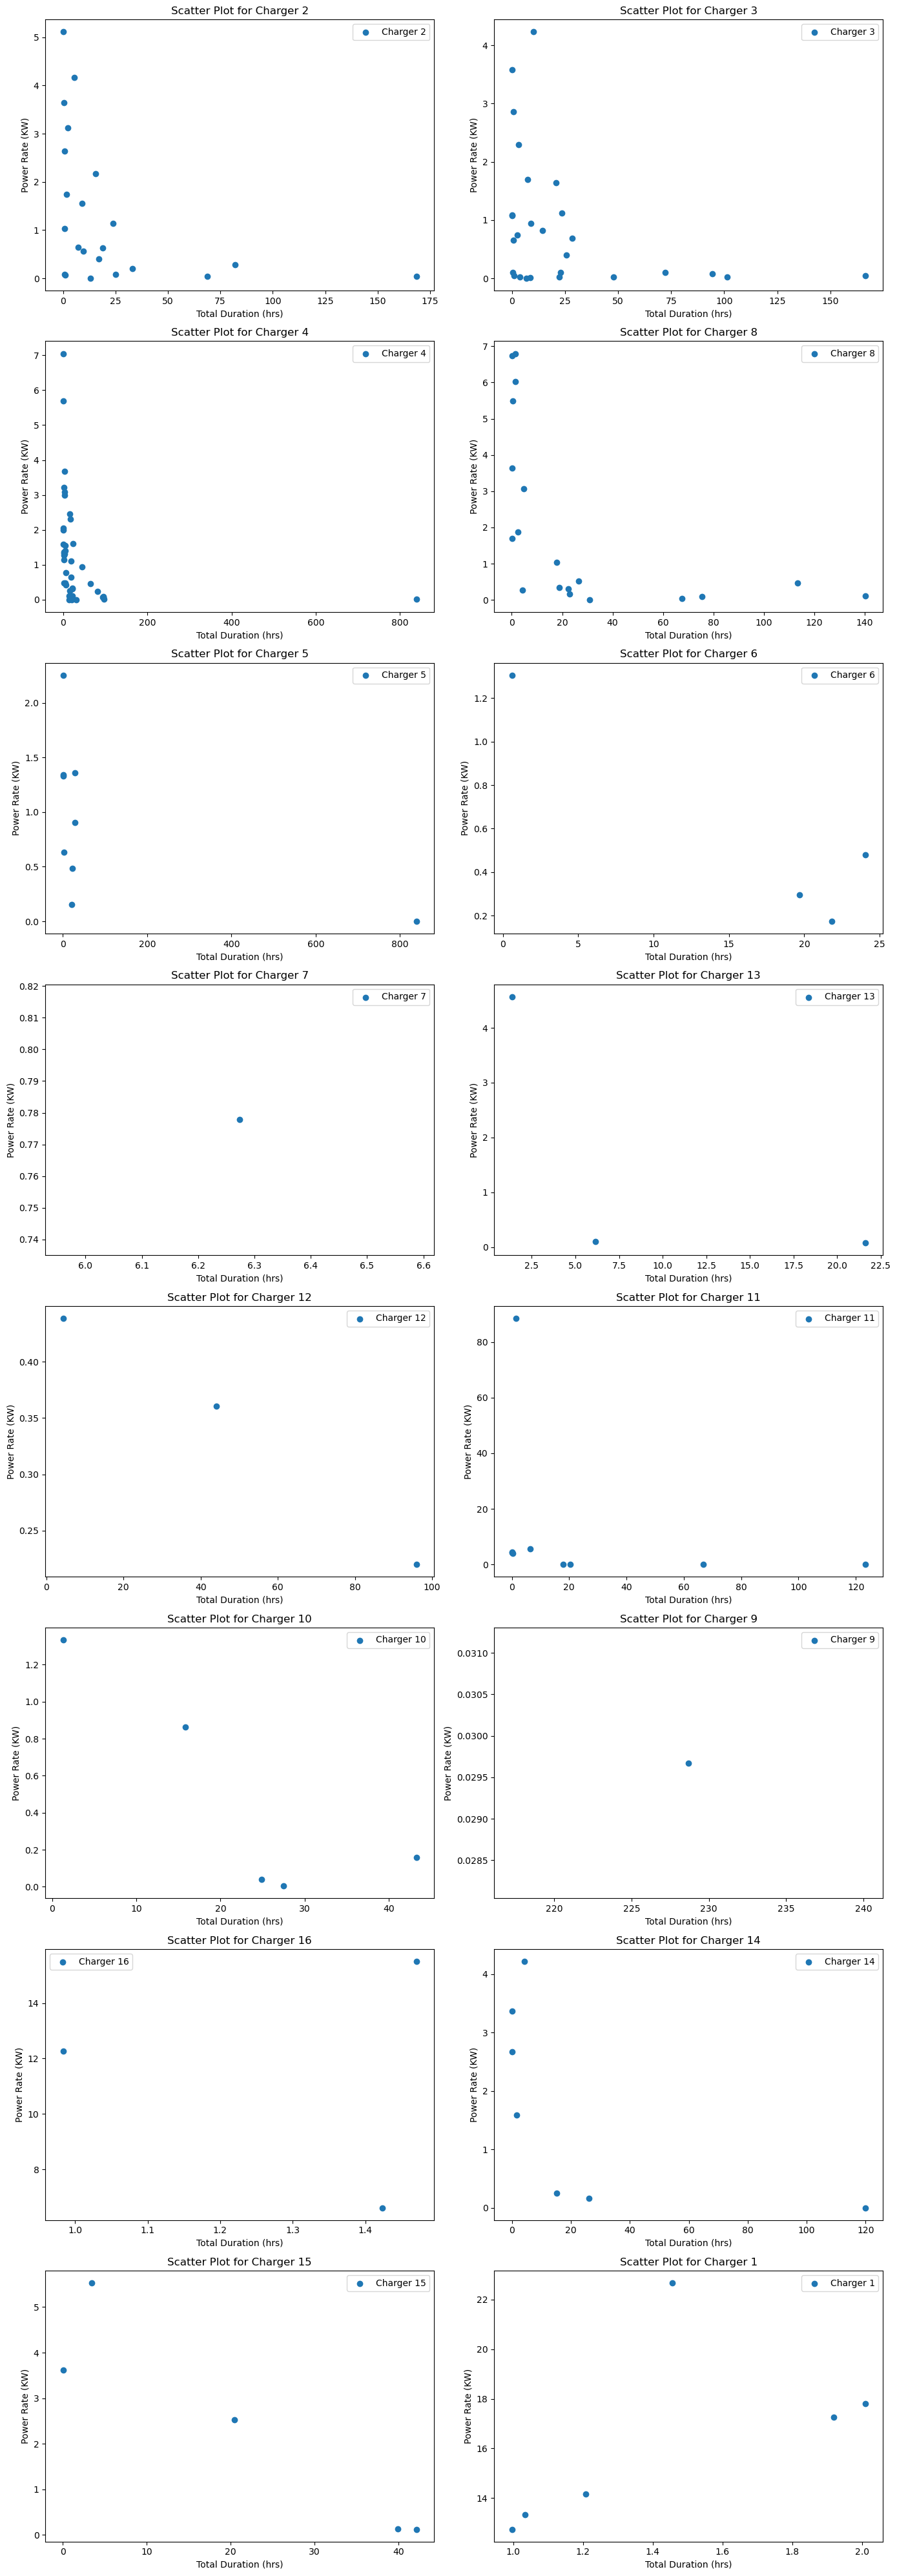

In [66]:
charger_ids = df2['Charger_ID'].unique()

n_rows = len(charger_ids) // 2 + len(charger_ids) % 2
n_cols = 2

fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 5 * n_rows))

axes = axes.flatten()

for i, charger_id in enumerate(charger_ids):
    df_charger = df2[df2['Charger_ID'] == charger_id]
    
    ax = axes[i]
    
    ax.scatter(df_charger['Total_duration(hrs)'], df_charger['Power Rate (KW)'], label=f'Charger {charger_id}')
    
    ax.set_xlabel('Total Duration (hrs)')
    ax.set_ylabel('Power Rate (KW)')
    
    ax.set_title(f'Scatter Plot for Charger {charger_id}')
    
    ax.legend()

plt.tight_layout()

plt.show()

## Scatter plot total units vs total duration charger wise

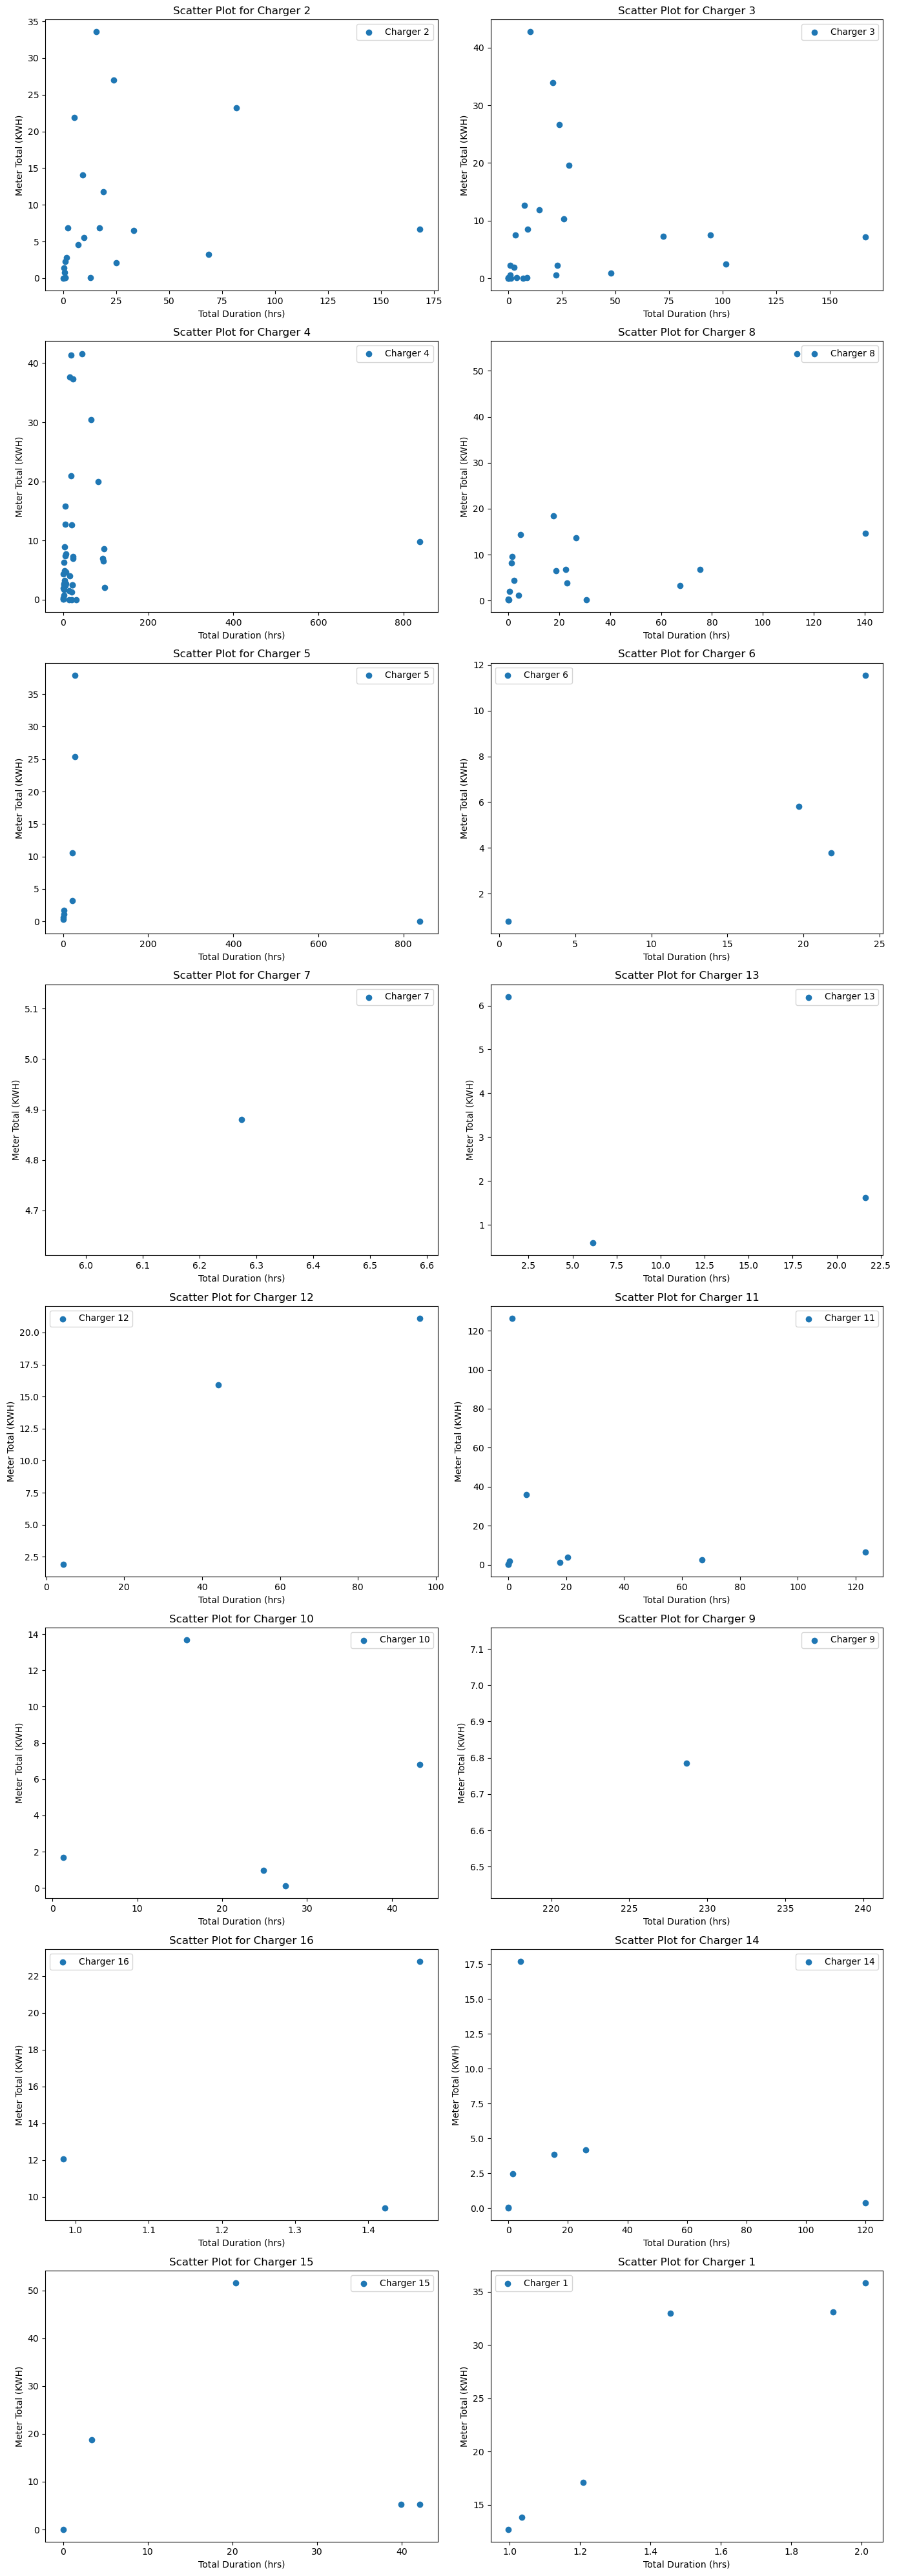

In [46]:
charger_ids = df2['Charger_ID'].unique()

n_rows = len(charger_ids) // 2 + len(charger_ids) % 2
n_cols = 2

fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 5 * n_rows))

axes = axes.flatten()

for i, charger_id in enumerate(charger_ids):
    
    df_charger = df2[df2['Charger_ID'] == charger_id]
    
    ax = axes[i]
    
    ax.scatter(df_charger['Total_duration(hrs)'], df_charger['Meter Total(KWH)'], label=f'Charger {charger_id}')
    
    ax.set_xlabel('Total Duration (hrs)')
    ax.set_ylabel('Meter Total (KWH)')
    
    ax.set_title(f'Scatter Plot for Charger {charger_id}')
    
    ax.legend()

plt.tight_layout()

plt.show()

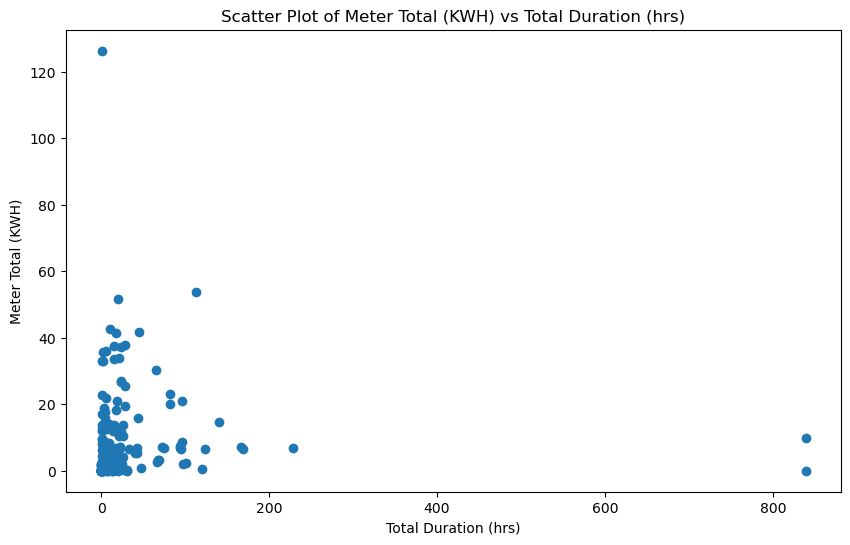

In [44]:
plt.figure(figsize=(10, 6))
plt.scatter(df2['Total_duration(hrs)'], df2['Meter Total(KWH)'])
plt.xlabel('Total Duration (hrs)')
plt.ylabel('Meter Total (KWH)')
plt.title('Scatter Plot of Meter Total (KWH) vs Total Duration (hrs)')
plt.show()

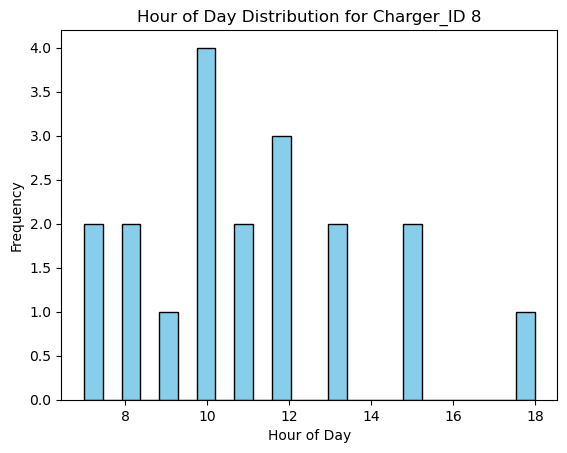

In [87]:
charger_2_data = df2[df2['Charger_ID'] == 8]
plt.hist(charger_2_data['Hour of Day'], bins=24, color='skyblue', edgecolor='black')
plt.xlabel('Hour of Day')
plt.ylabel('Frequency')
plt.title('Hour of Day Distribution for Charger_ID 8')
plt.show()
# For each charger change the id

## Plotting

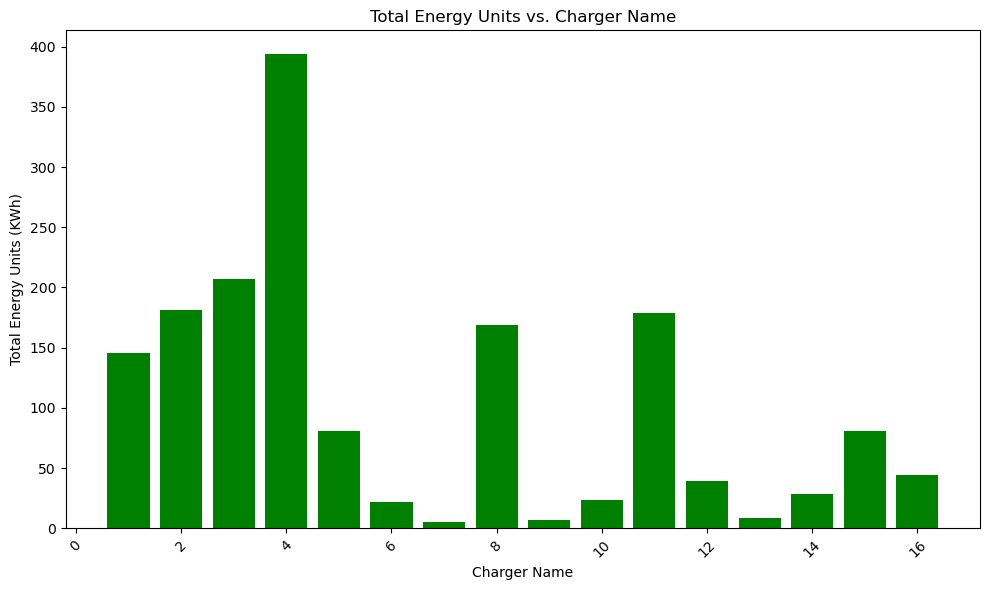

In [48]:
charger_energy_totals = df2.groupby('Charger_ID')['Meter Total(KWH)'].sum().reset_index()
plt.figure(figsize=(10, 6))
plt.bar(charger_energy_totals['Charger_ID'], charger_energy_totals['Meter Total(KWH)'],color='green')
plt.xlabel('Charger Name')
plt.ylabel('Total Energy Units (KWh)')
plt.title('Total Energy Units vs. Charger Name')
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()

In [37]:
df2.to_csv("charging.csv")